In [1]:
import pandas as pd
import numpy  as np
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('Traffic_Violations.csv', low_memory=False)

In [3]:
len(df)

1292399

In [4]:
df.head()

,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,...,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
0,09/24/2013,17:11:00,MCP,"3rd district, Silver Spring",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,8804 FLOWER AVE,NaN,NaN,No,No,...,13-401(h),Transportation Article,No,BLACK,M,TAKOMA PARK,MD,MD,A - Marked Patrol,NaN
1,08/29/2017,10:19:00,MCP,"2nd district, Bethesda",DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC...,WISCONSIN AVE@ ELM ST,38.981725,-77.092757,No,No,...,21-201(a1),Transportation Article,No,WHITE,F,FAIRFAX STATION,VA,VA,A - Marked Patrol,"(38.981725, -77.0927566666667)"
2,12/01/2014,12:52:00,MCP,"6th district, Gaithersburg / Montgomery Village",FAILURE STOP AND YIELD AT THRU HWY,CHRISTOPHER AVE/MONTGOMERY VILLAGE AVE,39.162888,-77.229088,No,No,...,21-403(b),Transportation Article,No,BLACK,F,UPPER MARLBORO,MD,MD,A - Marked Patrol,"(39.1628883333333, -77.2290883333333)"
3,08/29/2017,09:22:00,MCP,"3rd district, Silver Spring",FAILURE YIELD RIGHT OF WAY ON U TURN,CHERRY HILL RD./CALVERTON BLVD.,39.056975,-76.954633,No,No,...,21-402(b),Transportation Article,No,BLACK,M,FORT WASHINGTON,MD,MD,A - Marked Patrol,"(39.056975, -76.9546333333333)"
4,08/28/2017,23:41:00,MCP,"6th district, Gaithersburg / Montgomery Village",FAILURE OF DR. TO MAKE LANE CHANGE TO AVAIL. L...,355 @ SOUTH WESTLAND DRIVE,NaN,NaN,No,No,...,21-405(e1),Transportation Article,No,WHITE,M,GAITHERSBURG,MD,MD,A - Marked Patrol,NaN


In [5]:
df.isnull().sum()          

Date Of Stop                   0
Time Of Stop                   0
Agency                         0
SubAgency                     10
Description                    9
Location                       2
Latitude                   95354
Longitude                  95354
Accident                       0
Belts                          0
Personal Injury                0
Property Damage                0
Fatal                          0
Commercial License             0
HAZMAT                         0
Commercial Vehicle             0
Alcohol                        0
Work Zone                      0
State                         59
VehicleType                    0
Year                        8074
Make                          57
Model                        187
Color                      16127
Violation Type                 0
Charge                         0
Article                    65169
Contributed To Accident        0
Race                           0
Gender                         0
Driver Cit

In [6]:
df.dtypes

Date Of Stop                object
Time Of Stop                object
Agency                      object
SubAgency                   object
Description                 object
Location                    object
Latitude                   float64
Longitude                  float64
Accident                    object
Belts                       object
Personal Injury             object
Property Damage             object
Fatal                       object
Commercial License          object
HAZMAT                      object
Commercial Vehicle          object
Alcohol                     object
Work Zone                   object
State                       object
VehicleType                 object
Year                       float64
Make                        object
Model                       object
Color                       object
Violation Type              object
Charge                      object
Article                     object
Contributed To Accident     object
Race                

#### Converts all upper case to lower case and space is replaced by  _

In [7]:
df.columns = df.columns.str.lower().str.replace(' ','_')
string_columns = list(df.dtypes[df.dtypes =='object'].index)
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ','_')

In [8]:
df.head()

,date_of_stop,time_of_stop,agency,subagency,description,location,latitude,longitude,accident,belts,...,charge,article,contributed_to_accident,race,gender,driver_city,driver_state,dl_state,arrest_type,geolocation
0,09/24/2013,17:11:00,mcp,"3rd_district,_silver_spring",driving_vehicle_on_highway_with_suspended_regi...,8804_flower_ave,NaN,NaN,no,no,...,13-401(h),transportation_article,no,black,m,takoma_park,md,md,a_-_marked_patrol,NaN
1,08/29/2017,10:19:00,mcp,"2nd_district,_bethesda",driver_failure_to_obey_properly_placed_traffic...,wisconsin_ave@_elm_st,38.981725,-77.092757,no,no,...,21-201(a1),transportation_article,no,white,f,fairfax_station,va,va,a_-_marked_patrol,"(38.981725,_-77.0927566666667)"
2,12/01/2014,12:52:00,mcp,"6th_district,_gaithersburg_/_montgomery_village",failure_stop_and_yield_at_thru_hwy,christopher_ave/montgomery_village_ave,39.162888,-77.229088,no,no,...,21-403(b),transportation_article,no,black,f,upper_marlboro,md,md,a_-_marked_patrol,"(39.1628883333333,_-77.2290883333333)"
3,08/29/2017,09:22:00,mcp,"3rd_district,_silver_spring",failure_yield_right_of_way_on_u_turn,cherry_hill_rd./calverton_blvd.,39.056975,-76.954633,no,no,...,21-402(b),transportation_article,no,black,m,fort_washington,md,md,a_-_marked_patrol,"(39.056975,_-76.9546333333333)"
4,08/28/2017,23:41:00,mcp,"6th_district,_gaithersburg_/_montgomery_village",failure_of_dr._to_make_lane_change_to_avail._l...,355_@_south_westland_drive,NaN,NaN,no,no,...,21-405(e1),transportation_article,no,white,m,gaithersburg,md,md,a_-_marked_patrol,NaN


In [9]:
df.dropna(inplace=True) #  drop the null values

In [10]:
df.isnull().sum()

date_of_stop               0
time_of_stop               0
agency                     0
subagency                  0
description                0
location                   0
latitude                   0
longitude                  0
accident                   0
belts                      0
personal_injury            0
property_damage            0
fatal                      0
commercial_license         0
hazmat                     0
commercial_vehicle         0
alcohol                    0
work_zone                  0
state                      0
vehicletype                0
year                       0
make                       0
model                      0
color                      0
violation_type             0
charge                     0
article                    0
contributed_to_accident    0
race                       0
gender                     0
driver_city                0
driver_state               0
dl_state                   0
arrest_type                0
geolocation   

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1120327 entries, 1 to 1291740
Data columns (total 35 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   date_of_stop             1120327 non-null  object 
 1   time_of_stop             1120327 non-null  object 
 2   agency                   1120327 non-null  object 
 3   subagency                1120327 non-null  object 
 4   description              1120327 non-null  object 
 5   location                 1120327 non-null  object 
 6   latitude                 1120327 non-null  float64
 7   longitude                1120327 non-null  float64
 8   accident                 1120327 non-null  object 
 9   belts                    1120327 non-null  object 
 10  personal_injury          1120327 non-null  object 
 11  property_damage          1120327 non-null  object 
 12  fatal                    1120327 non-null  object 
 13  commercial_license       1120327 non-null 

In [12]:
len(df)

1120327

In [13]:
df['color'].describe()

count     1120327
unique         26
top         black
freq       228552
Name: color, dtype: object

In [14]:
df['model'].describe()

count     1120327
unique      16125
top            4s
freq       123370
Name: model, dtype: object

In [15]:
df['color'].value_counts()

black          228552
silver         208094
white          173313
gray           125461
red             88826
blue            82911
green           42496
gold            36006
blue,_dark      23953
tan             23654
maroon          19675
blue,_light     15218
beige           12837
green,_dk       12615
green,_lgt       6451
brown            5228
yellow           4255
orange           3879
bronze           2623
purple           2179
multicolor        832
cream             704
copper            363
pink              160
camouflage         22
chrome             20
Name: color, dtype: int64

In [16]:
df['model'].value_counts()

4s            123370
tk             72245
accord         41579
civic          38953
camry          38063
               ...  
maxia              1
nav,               1
lxv6               1
ram_pup            1
impala_x16         1
Name: model, Length: 16125, dtype: int64

In [17]:
for c in ['color']:
    print(df[[c,'violation_type']].groupby([c],as_index=False).sum().sort_values(by=c))

          color                                     violation_type
0         beige  citationcitationcitationcitationcitationcitati...
1         black  citationcitationcitationcitationcitationcitati...
2          blue  citationcitationcitationcitationcitationcitati...
3    blue,_dark  citationcitationcitationcitationcitationcitati...
4   blue,_light  citationcitationcitationcitationcitationcitati...
5        bronze  citationcitationcitationcitationwarningwarning...
6         brown  citationcitationcitationcitationcitationcitati...
7    camouflage  citationcitationcitationwarningcitationcitatio...
8        chrome  citationcitationcitationcitationwarningwarning...
9        copper  citationwarningcitationwarningwarningwarningwa...
10        cream  citationcitationcitationwarningwarningcitation...
11         gold  citationcitationcitationcitationcitationcitati...
12         gray  citationcitationcitationcitationcitationcitati...
13        green  citationcitationcitationcitationcitationcitat

In [18]:
for c in ['color']:
    print(df[[c,'violation_type']].groupby([c],as_index=False).count().sort_values(by=c))
    
#black color vehicles are most likely to get involved in a traffic violation 

          color  violation_type
0         beige           12837
1         black          228552
2          blue           82911
3    blue,_dark           23953
4   blue,_light           15218
5        bronze            2623
6         brown            5228
7    camouflage              22
8        chrome              20
9        copper             363
10        cream             704
11         gold           36006
12         gray          125461
13        green           42496
14    green,_dk           12615
15   green,_lgt            6451
16       maroon           19675
17   multicolor             832
18       orange            3879
19         pink             160
20       purple            2179
21          red           88826
22       silver          208094
23          tan           23654
24        white          173313
25       yellow            4255


In [19]:
for c in ['model']:
    print(df[[c,'violation_type']].groupby([c],as_index=False).sum().sort_values(by=c))

              model                                     violation_type
0         (comcast)                                           citation
1       (sw)_passat                                     warningwarning
2                 -  warningwarningwarningcitationwarningwarningwar...
3             -----                                            warning
4                 .  citationcitationcitationcitationcitationcitati...
...             ...                                                ...
16120          zx8r                                    citationwarning
16121           zx9                                            warning
16122        zx_600   citationcitationcitationcitationcitationcitation
16123  zy1_suburban                                           citation
16124       zzr1200   citationcitationcitationcitationcitationcitation

[16125 rows x 2 columns]


In [20]:
for c in ['model']:
    print(df[[c,'violation_type']].groupby([c],as_index=False).count().sort_values(by=c))
    
# 4s model vehicles are most likely to get involved in traffic violation

              model  violation_type
0         (comcast)               1
1       (sw)_passat               2
2                 -              11
3             -----               1
4                 .              26
...             ...             ...
16120          zx8r               2
16121           zx9               1
16122        zx_600               6
16123  zy1_suburban               1
16124       zzr1200               6

[16125 rows x 2 columns]


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='color', ylabel='count'>

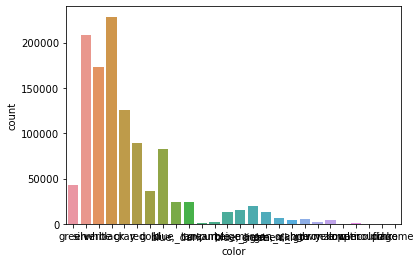

In [21]:
sns.countplot(df['color'])


In [22]:
stops = df.violation_type.value_counts()
violation_type_df = stops.to_frame()
violation_type_df


,violation_type
warning,577822
citation,542482
sero,23


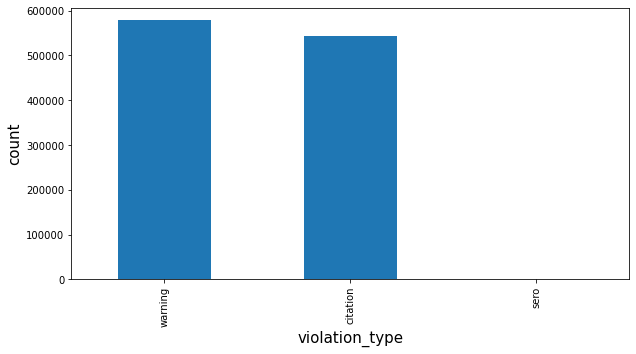

In [23]:
df['violation_type'].value_counts().plot(kind='bar', figsize = (10,5))
plt.xlabel('violation_type', size = 15)
plt.ylabel('count' , size = 15)
plt.show()

<AxesSubplot:>

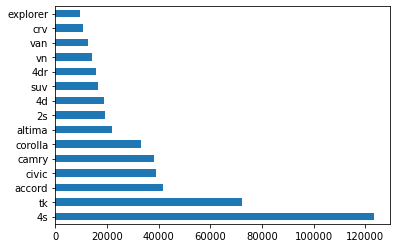

In [24]:
df['model'].value_counts()[:15].plot(kind='barh')

In [25]:
df['race'].value_counts()

white              405965
black              353301
hispanic           231876
asian               65769
other               60792
native_american      2624
Name: race, dtype: int64

<AxesSubplot:>

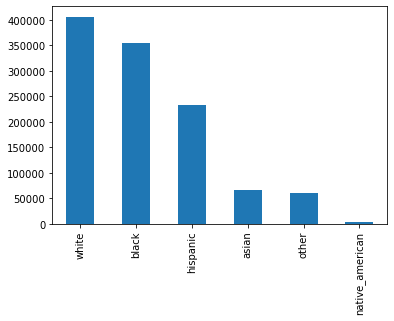

In [26]:
df['race'].value_counts()[:10].plot(kind='bar')

no     1120139
yes        188
Name: fatal, dtype: int64
fatal:  ['no' 'yes']
total number of fatal in df: 2


<AxesSubplot:>

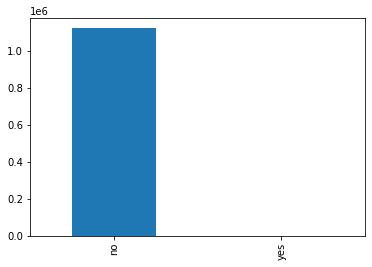

In [27]:
print(df['fatal'].value_counts())
print("fatal: ", df.fatal.unique())
print("total number of fatal in df:",len(df.fatal.unique()))
df['fatal'].value_counts()[:20].plot(kind='bar')

m    747492
f    371571
u      1264
Name: gender, dtype: int64
gender:  ['f' 'm' 'u']
total number of genders in df: 3


<AxesSubplot:>

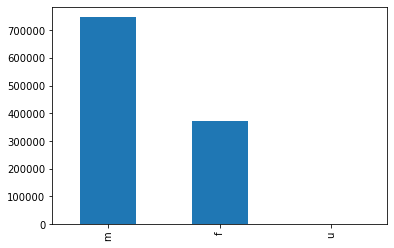

In [28]:
print(df['gender'].value_counts())
print("gender: ", df.gender.unique())
print("total number of genders in df:",len(df.gender.unique()))
df['gender'].value_counts()[:20].plot(kind='bar')

no     1080690
yes      39637
Name: belts, dtype: int64
belts:  ['no' 'yes']
total number of belts option in df: 2


<AxesSubplot:>

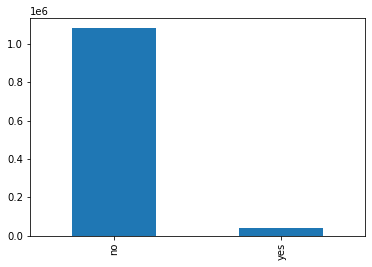

In [29]:
print(df['belts'].value_counts())
print("belts: ", df.belts.unique())
print("total number of belts option in df:",len(df.belts.unique()))
df['belts'].value_counts()[:20].plot(kind='bar')

no     1107139
yes      13188
Name: personal_injury, dtype: int64
personal_injury:  ['no' 'yes']
total number of personal_injury in df: 2


<AxesSubplot:>

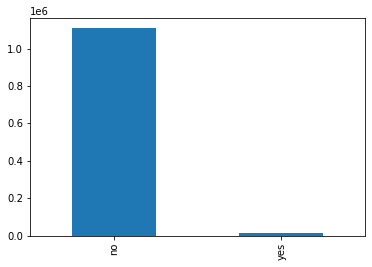

In [30]:
print(df['personal_injury'].value_counts())
print("personal_injury: ", df.personal_injury.unique())
print("total number of personal_injury in df:",len(df.personal_injury.unique()))
df['personal_injury'].value_counts()[:20].plot(kind='bar')

no     1114838
yes       5489
Name: commercial_vehicle, dtype: int64
commercial_vehicle:  ['no' 'yes']
total number of commercial_vehicle in df: 2


<AxesSubplot:ylabel='commercial_vehicle'>

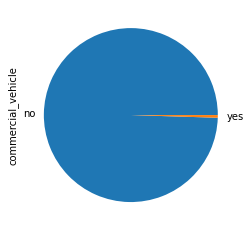

In [31]:
print(df['commercial_vehicle'].value_counts())
print("commercial_vehicle: ", df.commercial_vehicle.unique())
print("total number of commercial_vehicle in df:",len(df.commercial_vehicle.unique()))
df['commercial_vehicle'].value_counts()[:20].plot(kind='pie')

state:  ['va' 'md' 'dc' 'pa' 'ny' 'tn' 'de' 'ma' 'wv' 'fl' 'us' 'in' 'nj' 'mi'
 'ca' 'ga' 'oh' 'ok' 'wa' 'sc' 'ct' 'nc' 'il' 'xx' 'al' 'vi' 'mo' 'tx'
 'ky' 'az' 'on' 'nh' 'nm' 'ms' 'la' 'ri' 'nv' 'me' 'mn' 'id' 'wi' 'ar'
 'vt' 'co' 'or' 'ak' 'ks' 'nb' 'mt' 'mb' 'ia' 'ut' 'pr' 'hi' 'ab' 'ne'
 'wy' 'nf' 'qc' 'sd' 'nd' 'pq' 'mh' 'pe' 'bc' 'gu' 'ns' 'as' 'it']
total number of state in df: 69


<AxesSubplot:>

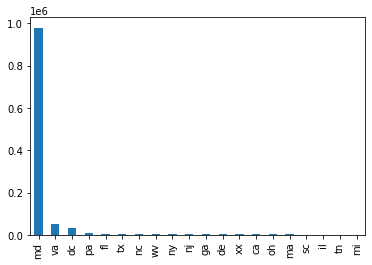

In [32]:
print("state: ", df.state.unique())
print("total number of state in df:",len(df.state.unique()))
df['state'].value_counts()[:20].plot(kind='bar')

driver state:  ['va' 'md' 'dc' 'ny' 'pa' 'ak' 'nj' 'fl' 'az' 'oh' 'ct' 'wv' 'ca' 'nc'
 'tx' 'ga' 'il' 'de' 'wa' 'nv' 'ma' 'mo' 'ky' 'al' 'on' 'mi' 'sc' 'la'
 'xx' 'or' 'tn' 'ri' 'me' 'nh' 'pr' 'ks' 'wi' 'co' 'nd' 'mb' 'id' 'ok'
 'ut' 'hi' 'mt' 'ms' 'nm' 'in' 'mn' 'vi' 'ia' 'ne' 'wy' 'qc' 'sd' 'ar'
 'vt' 'gu' 'pe' 'ab' 'nf' 'us' 'bc' 'sk' 'ns' 'nb' 'pq']
total number of driver state in df: 67


<AxesSubplot:>

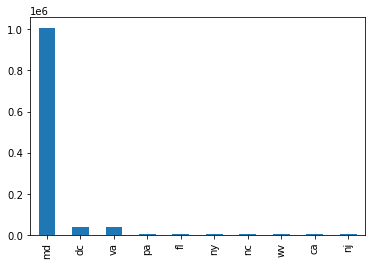

In [33]:
print("driver state: ", df.driver_state.unique())
print("total number of driver state in df:",len(df.driver_state.unique()))
df['driver_state'].value_counts()[:10].plot(kind='bar')

driver city:  ['fairfax_station' 'upper_marlboro' 'fort_washington' ... 'thurmony'
 'chico' 'bell_gardens']
total number of city in df: 6870


<AxesSubplot:ylabel='driver_city'>

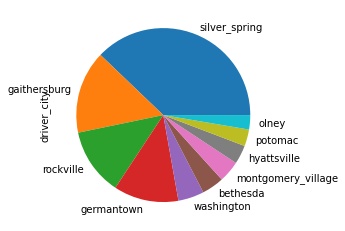

In [34]:
print("driver city: ", df.driver_city.unique())
print("total number of city in df:",len(df.driver_city.unique()))
df['driver_city'].value_counts()[:10].plot(kind='pie')

vehicle type:  ['02_-_automobile' '28_-_other' '05_-_light_duty_truck' '10_-_transit_bus'
 '01_-_motorcycle' '08_-_recreational_vehicle' '06_-_heavy_duty_truck'
 '03_-_station_wagon' '20_-_commercial_rig' '04_-_limousine'
 '07_-_truck/road_tractor' '19_-_moped' '09_-_farm_vehicle'
 '25_-_utility_trailer' '21_-_tandem_trailer' '26_-_boat_trailer'
 '12_-_school_bus' '16_-_fire(non-emerg)' '27_-_farm_equipment'
 '11_-_cross_country_bus' '29_-_unknown' '18_-_police_vehicle'
 '13_-_ambulance(emerg)' '18_-_police(non-emerg)' '13_-_ambulance'
 '22_-_mobile_home' '24_-_camper' '23_-_travel/home_trailer'
 '15_-_fire(emerg)' '14_-_ambulance(non-emerg)' '15_-_fire_vehicle'
 '17_-_police(emerg)']
total number of vehicle in df: 32


<AxesSubplot:>

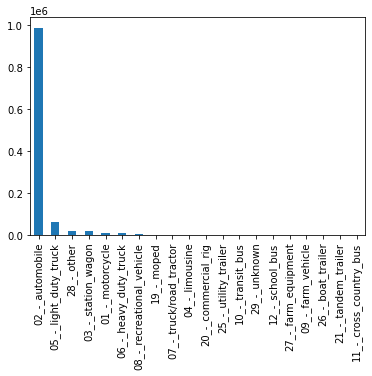

In [35]:
print("vehicle type: ", df.vehicletype.unique())
print("total number of vehicle in df:",len(df.vehicletype.unique()))
df['vehicletype'].value_counts()[:20].plot(kind='bar')

make:  ['toyota' 'honda' 'dodg' ... 'boss' 'missubishi' 'volk.']
total number of make in df: 3299


<AxesSubplot:>

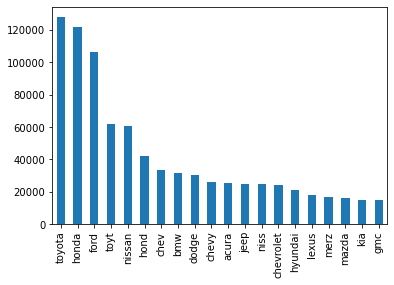

In [36]:
print("make: ", df.make.unique())
print("total number of make in df:",len(df.make.unique()))
df['make'].value_counts()[:20].plot(kind='bar')

charge:  ['21-201(a1)' '21-403(b)' '21-402(b)' '13-401(h)' '21-311(1)'
 '21-1124.2(d2)' '22-412.3(b)' '21-902(b1)' '21-707(a)' '16-303(d)'
 '13-411(a)' '21-404(b)' '20-103(b)' '16-115(g)' '16-101(a)' '21-801.1'
 '21-402(a)' '16-116(a)' '20-105(a)' '16-303(c)' '21-403(d)' '16-303(h)'
 '16-301(j)' '13-409(b)' '21-801(b)' '13-411(d)' '16-301(e)' '21-401'
 '21-902(a1)' '21-1102(a)' '22-226(a)' '21-308(a)' '21-304(c)'
 '21-901.1(b)' '21-310(a)' '21-309(d)' '21-801(a)' '16-113(h)' '13-703(g)'
 '13-401(b)' '21-202(h1)' '21-1003(o)' '16-112(c)' '21-902(a2)'
 '21-904(b2)' '21-1101(a)' '16-303(f)' '16-113(j)' '16-113(k)' '13-411(f)'
 '22-203(b)' '21-405(e1)' '13-401(b1)' '21-604(d)' '16-105(b1)'
 '21-204(d)' '16-112(e)' '21-1001(b)' '16-303(g)' '22-209(b)'
 '22-412.3(c2)' '21-1003(aa)' '21-204(b)' '21-309(b)' '21-202(i2)'
 '22-201.1' '21-201(a2)' '13-411(c1)' '22-219(a)' '21-202(i1)'
 '22-406(i1)' '13-936e2i' '17-107' '21-202(k)' '21-601(b)' '13-411(c2)'
 '21-902(c1)' '21-502(a2)' '16-105(b2)' '

<AxesSubplot:>

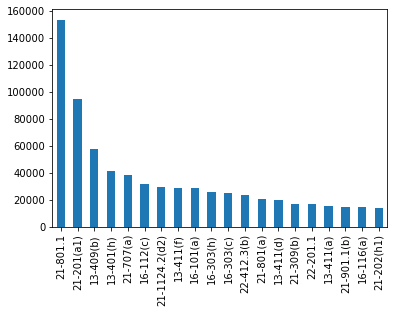

In [37]:
print("charge: ", df.charge.unique())
print("total number of charges in df:",len(df.charge.unique()))
df['charge'].value_counts()[:20].plot(kind='bar')

date of stop:  ['08/29/2017' '12/01/2014' '10/08/2013' ... '08/20/2017' '08/22/2017'
 '08/24/2017']


<AxesSubplot:>

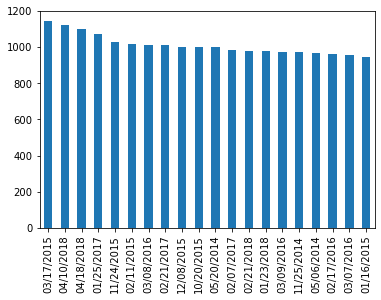

In [38]:
print("date of stop: ", df.date_of_stop.unique())
df['date_of_stop'].value_counts()[:20].plot(kind='bar')

time of stop:  ['10:19:00' '12:52:00' '09:22:00' ... '05:33:00' '04:55:00' '04:01:00']


<AxesSubplot:>

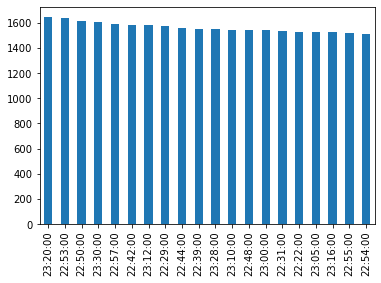

In [39]:
print("time of stop: ", df.time_of_stop.unique())
df['time_of_stop'].value_counts()[:20].plot(kind='bar')

arrest_type:  ['a_-_marked_patrol' 'q_-_marked_laser' 'b_-_unmarked_patrol'
 'm_-_marked_(off-duty)' 'e_-_marked_stationary_radar' 'l_-_motorcycle'
 'r_-_unmarked_laser' 'o_-_foot_patrol' 's_-_license_plate_recognition'
 'd_-_unmarked_vascar' 'i_-_marked_moving_radar_(moving)'
 'h_-_unmarked_moving_radar_(stationary)'
 'g_-_marked_moving_radar_(stationary)' 'f_-_unmarked_stationary_radar'
 'p_-_mounted_patrol' 'c_-_marked_vascar'
 'j_-_unmarked_moving_radar_(moving)' 'n_-_unmarked_(off-duty)'
 'k_-_aircraft_assist']
total number of arrest types in df: 19


<AxesSubplot:>

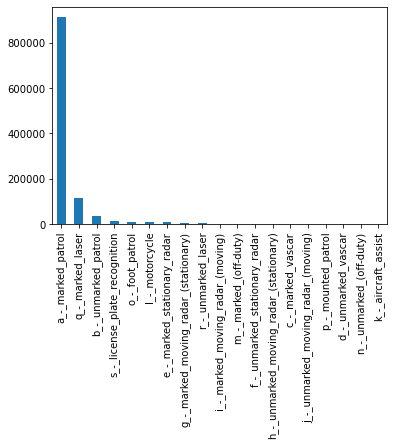

In [40]:
print("arrest_type: ", df.arrest_type.unique())
print("total number of arrest types in df:",len(df.arrest_type.unique()))
df['arrest_type'].value_counts()[:20].plot(kind='bar')

  gender  accident   belts  personal_injury  alcohol   fatal  property_damage
0      f    371571  371571           371571   371571  371571           371571
1      m    747492  747492           747492   747492  747492           747492
2      u      1264    1264             1264     1264    1264             1264


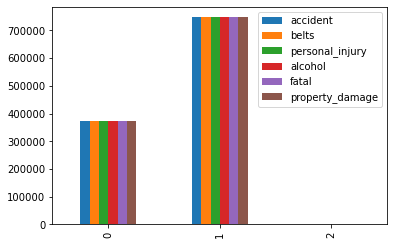

In [41]:
for c in ['gender']:
    gender_violations=df[['gender','accident','belts','personal_injury','alcohol','fatal','property_damage']].groupby([c],as_index=False).count().sort_values(by=c)
    print(gender_violations)
    gender_violations.plot(kind='bar')